In [ ]:
from enum import Enum
import math
import matplotlib.pyplot as plt

# Define PayoffType enumeration
class PayoffType(Enum):
    Call = 1
    Put = 2

In [4]:
class AmericanOption():
    def __init__(self, expiry, strike, payoffType):
        self.expiry = expiry
        self.strike = strike
        self.payoffType = payoffType
    def payoff(self, S):
        if self.payoffType == PayoffType.Call:
            return max(S - self.strike, 0)
        elif self.payoffType == PayoffType.Put:
            return max(self.strike - S, 0)
        else:
            raise Exception("payoffType not supported: ", self.payoffType)
    def valueAtNode(self, t, S, continuation):
        return max(self.payoff(S), continuation)

In [5]:
# Option class definitions
class EuropeanOption():
    def __init__(self, expiry, strike, payoffType):
        self.expiry = expiry
        self.strike = strike
        self.payoffType = payoffType

    def payoff(self, S):
        if self.payoffType == PayoffType.Call:
            return max(S - self.strike, 0)
        elif self.payoffType == PayoffType.Put:
            return max(self.strike - S, 0)
        else:
            raise Exception("payoffType not supported: ", self.payoffType)

    def valueAtNode(self, t, S, continuation):
        return continuation

In [6]:
# Binomial pricing model function
def crrBinomialG(S, r, vol, trade, n): # trade contain payoffType, K, T
    t = trade.expiry / n
    b = math.exp(vol * vol * t + r*t) + math.exp(-r * t)
    u = (b + math.sqrt(b*b - 4)) / 2
    p = (math.exp(r * t) - (1/u)) / (u - 1/u)
    vs = [trade.payoff(S * u**(n-i-i)) for i in range(n+1)]
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            nodeS = S*u**(i-j-j)
            continuation = math.exp(-r * t) * (vs[j] * p + vs[j+1] * (1-p))
            vs[j] = trade.valueAtNode(t*i, nodeS, continuation)
    return vs[0]


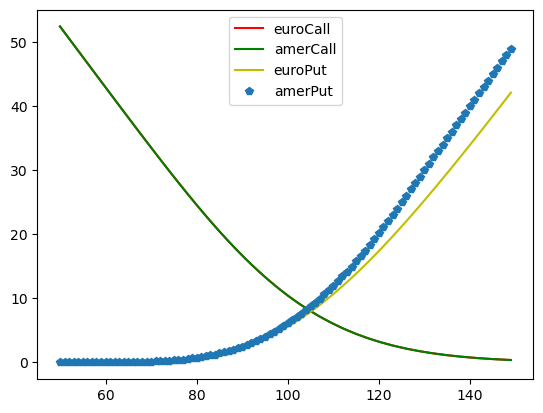

In [11]:
euroPrc, amerPrc = [], []
S,r, vol= 100, 0.05, 0.2
ks = range(50, 150)

for k in ks:
    euroPrc.append(crrBinomialG(S, r, vol, EuropeanOption(1, float(k), PayoffType.Call), 300))
    amerPrc.append(crrBinomialG(S, r, vol, AmericanOption(1, float(k), PayoffType.Call), 300))

plt.plot(ks, euroPrc, 'r', label='euroCall')
plt.plot(ks, amerPrc, 'g', label='amerCall')

# Reset the prices list for put options
euroPrc, amerPrc = [], []
for k in ks:
    euroPrc.append(crrBinomialG(S, r, vol, EuropeanOption(1, float(k), PayoffType.Put), 300))
    amerPrc.append(crrBinomialG(S, r, vol, AmericanOption(1, float(k), PayoffType.Put), 300))

plt.plot(ks, euroPrc, 'y', label='euroPut')
plt.plot(ks, amerPrc, 'p', label='amerPut')

plt.legend()
plt.show()

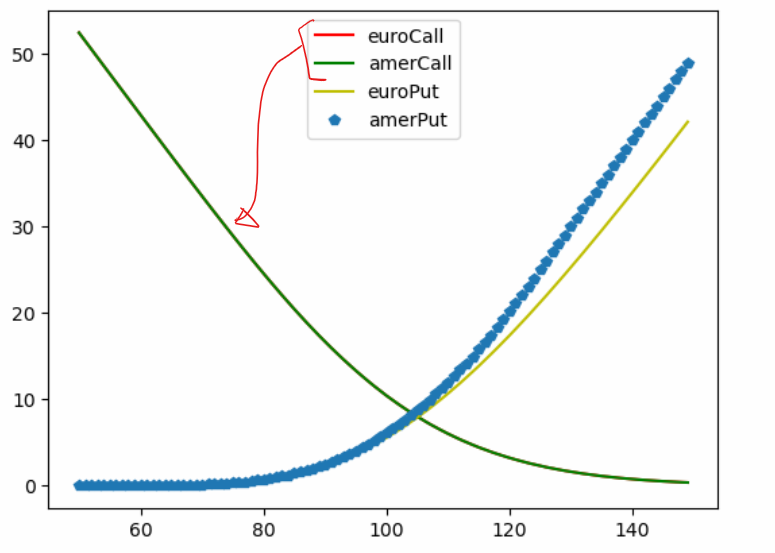

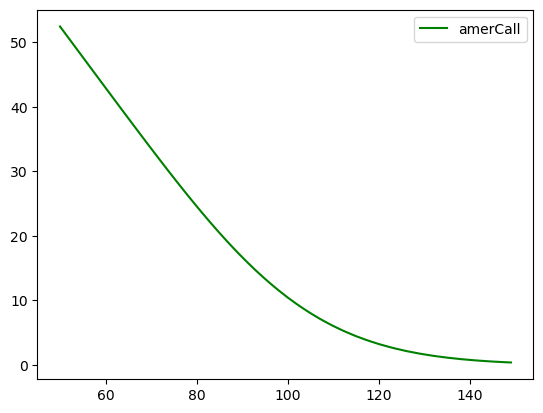

In [10]:
euroPrc, amerPrc = [], []
S,r, vol= 100, 0.05, 0.2
ks = range(50, 150)

for k in ks:
    euroPrc.append(crrBinomialG(S, r, vol, EuropeanOption(1, float(k), PayoffType.Call), 300))
    amerPrc.append(crrBinomialG(S, r, vol, AmericanOption(1, float(k), PayoffType.Call), 300))

# plt.plot(ks, euroPrc, 'r', label='euroCall')
plt.plot(ks, amerPrc, 'g', label='amerCall')

# # Reset the prices list for put options
# euroPrc, amerPrc = [], []
# for k in ks:
#     euroPrc.append(crrBinomialG(S, r, vol, EuropeanOption(1, float(k), PayoffType.Put), 300))
#     amerPrc.append(crrBinomialG(S, r, vol, AmericanOption(1, float(k), PayoffType.Put), 300))

# plt.plot(ks, euroPrc, 'r', label='euroPut')
# plt.plot(ks, amerPrc, 'g', label='amerPut')

plt.legend()
plt.show()

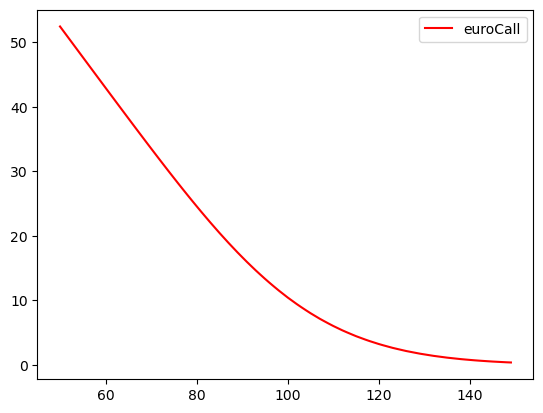

In [9]:
euroPrc, amerPrc = [], []
S,r, vol= 100, 0.05, 0.2
ks = range(50, 150)

for k in ks:
    euroPrc.append(crrBinomialG(S, r, vol, EuropeanOption(1, float(k), PayoffType.Call), 300))
    amerPrc.append(crrBinomialG(S, r, vol, AmericanOption(1, float(k), PayoffType.Call), 300))

plt.plot(ks, euroPrc, 'r', label='euroCall')
# plt.plot(ks, amerPrc, 'g', label='amerCall')

# # Reset the prices list for put options
# euroPrc, amerPrc = [], []
# for k in ks:
#     euroPrc.append(crrBinomialG(S, r, vol, EuropeanOption(1, float(k), PayoffType.Put), 300))
#     amerPrc.append(crrBinomialG(S, r, vol, AmericanOption(1, float(k), PayoffType.Put), 300))

# plt.plot(ks, euroPrc, 'r', label='euroPut')
# plt.plot(ks, amerPrc, 'g', label='amerPut')

plt.legend()
plt.show()